In [1]:
import pandas as pd
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:

data = pd.read_csv('phone_user_review_file_1.csv',sep=",", encoding='Latin-1')

custom_words = ['verizons', 'edge', 'phone', 'google', 'style', 'androids', 'wi-fi', 'software','calls','verizon',
 'camera', 'call', 'music', 'speaker', 'battery', 'browser', 'screen', 'charges','charger','android','life','batteryes',
 'portrait', 'cameras', 'lock', 'microphone', 'microphones', 'sensitivity', 'samsung', 'product', 'products', 'samsungs']

stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.remove('but')

stop_words.extend(custom_words)

stemmer = SnowballStemmer(language='english')


In [3]:
"""captuare english language data"""
en_data = data[data['lang'] == 'en']

"""first we remove NaN data from data set"""
# rounding data for example 9.2 > 9 
en_data = en_data.dropna().round()


#sample data from dataset
s_data = en_data[en_data['score'] == 1].copy()
for i in range(2,11):
    tmp = en_data[en_data['score'] == i].reset_index(drop=True)[:40200]
    s_data = s_data.append(tmp, ignore_index=True)

    
del en_data

data = s_data


y = data['score']
# data = en_data
# y = en_data['score'].tolist()

In [5]:
def new_finder(char):
    
    num = ord(char)
    
    if (num >= 65) and (num <= 90):
        return chr(num+32)
    if (num >= 97) and (num <= 122):
        return char
    if (num == 32) or (num == 39):
        return char
    return ''

In [6]:
def normalizer(text):
    """
        we want remove other letter from text and just keep english letter
        and lower case.
    """
    map_list = map(new_finder, text)
    sentence = ''.join(map_list)
    
    # tokenizing text and create list of the words
    word_tokens = word_tokenize(sentence)
    # stemming every words and and choose word if not in stopwords list
    # and delete words that have lesss than 2 letter 
    filtered_sentence = [stemmer.stem(w) for w in word_tokens if not w in stop_words and ((len(w) > 2)and (len(w)<13))]
    
    return filtered_sentence



In [7]:
def feature(data):
    try:
        feature_list = data['extract'].tolist()
    except:
        feature_list = [data]
#     feature_list = list(map(normalizer,data_text))
    return feature_list

In [8]:
def vectorize(feature_list):
    X_dtm = vect.fit_transform(feature_list)
    X_dtm = X_dtm.toarray()
    return X_dtm

In [9]:
def feature_selection(k, X_dtm, y):
    global chi2_features
    chi2_features = SelectKBest(chi2, k=k)
    X_kbest_features = chi2_features.fit_transform(X_dtm, y)
    return X_kbest_features


In [10]:
def proc(data):
    tokens = feature(data)
    transform_data = vect.transform(tokens).toarray()
    selection_feature = chi2_features.transform(transform_data)
    return selection_feature


In [11]:
vect = CountVectorizer(tokenizer=normalizer, max_features=18000)

In [14]:
train_data , test_data , y_train, y_test = train_test_split(data, y, test_size=0.10, random_state=2)

In [ ]:
X_dtm = vectorize(feature(train_data))

In [16]:
# X_train = feature_selection(4000, X_dtm, y_train)
X_test = proc(test_data)

In [15]:
X_dtm.shape

(97600, 18000)

In [159]:
X_dtm.shape

(22602, 11812)

In [35]:
# clf = MultinomialNB(alpha=1)
# clf.fit(X_train,y_train,)
predict_val_nb = clf.predict(X_test)
print(classification_report(y_test, predict_val_nb))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.56      0.75      0.64      1725
         3.0       0.00      0.00      0.00        11
         4.0       0.21      0.07      0.10       656
         5.0       0.00      0.00      0.00        25
         6.0       0.29      0.16      0.20      1043
         7.0       0.08      0.01      0.02        81
         8.0       0.51      0.53      0.52      2841
         9.0       0.22      0.13      0.16       557
        10.0       0.68      0.77      0.72      3901

    accuracy                           0.56     10845
   macro avg       0.25      0.24      0.24     10845
weighted avg       0.52      0.56      0.53     10845



In [11]:
from joblib import dump, load
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
clf = load('last_clf.joblib')
chi2_features = load('last_kbes.joblib')
vect = load('last_vectorizer.joblib')

In [23]:
data = pd.read_csv('phone_user_review_file_2.csv',sep=",", encoding='Latin-1')
en_data = data[data['lang'] == 'en']

"""first we remove NaN data from data set"""
# rounding data for example 9.2 > 9 
en_data = en_data.dropna().round()



In [24]:
en_data.phone_url.unique()

array(['/cellphones/leagoo-lead-7/', '/cellphones/thl-2015a/',
       '/cellphones/zopo-color-c-zp330/', '/cellphones/oppo-find-7/',
       '/cellphones/doogee-x5-pro/', '/cellphones/nokia-lumia-630/',
       '/cellphones/htc-one-x9/', '/cellphones/xiaomi-redmi-note/',
       '/cellphones/sony-xperia-z3/', '/cellphones/oukitel-u7-pro/',
       '/cellphones/xiaomi-mi-5s-plus/', '/cellphones/blu-studio-m-hd/',
       '/cellphones/xiaomi-mi4/', '/cellphones/motorola-moto-e-2-lte/',
       '/cellphones/zte-nubia-z9-max/', '/cellphones/blu-dash-x2/',
       '/cellphones/leagoo-elite-4/',
       '/cellphones/xiaomi-redmi-note-2-prime/',
       '/cellphones/meizu-m1-note/', '/cellphones/samsung-galaxy-j1/',
       '/cellphones/lg-magna-y90/', '/cellphones/microsoft-lumia-435/',
       '/cellphones/huawei-ascend-y5-y560/', '/cellphones/meitu-m4/',
       '/cellphones/cubot-s600/', '/cellphones/xiaomi-mi-3/',
       '/cellphones/google-pixel/', '/cellphones/oppo-r7s/',
       '/cellphones/gione

In [25]:
mobile_data = en_data[en_data["phone_url"].str.contains('blackberry-z30',case=False)].reset_index(drop=True)

In [26]:
X = proc(mobile_data)
y = mobile_data['score']

In [27]:
predict_val = clf.predict(X)
print(classification_report(y, predict_val))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.45      0.83      0.58        53
         4.0       0.16      0.10      0.12        31
         6.0       0.11      0.14      0.12        22
         8.0       0.20      0.50      0.29        96
         9.0       0.00      0.00      0.00         6
        10.0       0.90      0.56      0.69       516

    accuracy                           0.54       725
   macro avg       0.26      0.30      0.26       725
weighted avg       0.71      0.54      0.58       725



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
p_opinions = list()
for score in predict_val:
    if (score <= 3):
        p_opinions.append('bad')
    elif (score <= 7):
        p_opinions.append('acceptably')
    else:
        p_opinions.append('good')
    


In [29]:
predict_size = Counter(p_opinions)

good = predict_size['good']
bad = predict_size['bad']
acceptably = predict_size['acceptably']

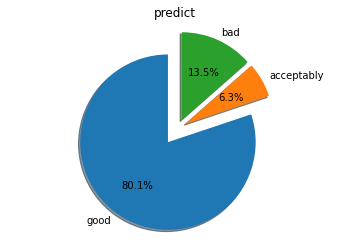

In [30]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'good', 'acceptably', 'bad'
sizes = [good, acceptably, bad]
explode = (0.2, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('predict')

plt.show()

In [31]:
opinions = list()
for score in y:
    if (score <= 3):
        opinions.append('bad')
    elif (score <= 7):
        opinions.append('acceptably')
    else:
        opinions.append('good')
        

real_size = Counter(opinions)

good = real_size['good']
bad = real_size['bad']
acceptably = real_size['acceptably']


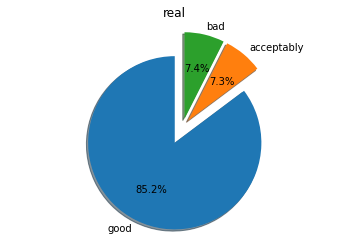

In [32]:
labels = 'good', 'acceptably', 'bad'
sizes = [good, acceptably, bad]
explode = (0.2, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('real')


plt.show()

In [36]:
predict_val = clf.predict(X)
print(classification_report(opinions, p_opinions))

              precision    recall  f1-score   support

  acceptably       0.26      0.23      0.24        53
         bad       0.45      0.81      0.58        54
        good       0.95      0.89      0.92       618

    accuracy                           0.84       725
   macro avg       0.55      0.65      0.58       725
weighted avg       0.86      0.84      0.85       725

